<a href="https://colab.research.google.com/github/praveenmech057/ML_Projects/blob/main/KNN_Algo_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/fashion-mnist_train.csv")

In [3]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(60000, 785)

<Axes: xlabel='label', ylabel='count'>

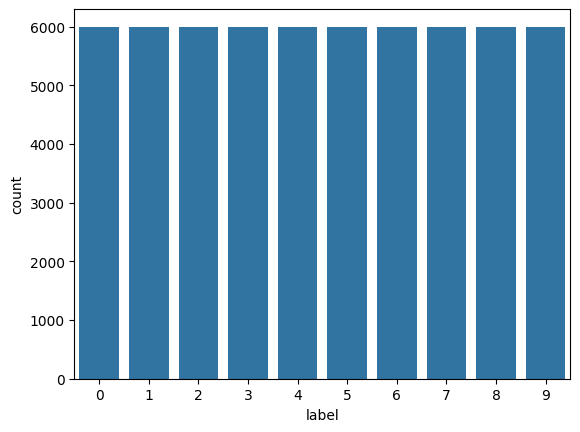

In [6]:
sns.countplot(data=df,x="label")

In [7]:
y= df["label"]

x = df.drop("label",axis=1)

In [9]:
print(x.shape)
print(y.shape)

(60000, 784)
(60000,)


# Exploratory data **analysis**

0


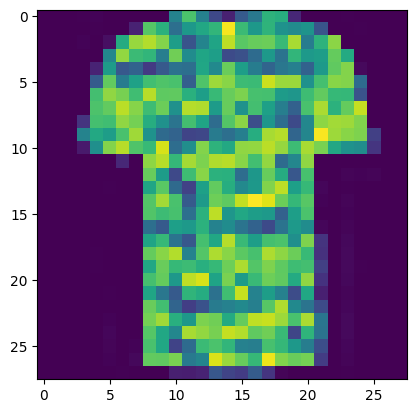

In [11]:
idx = 3
print(y[idx])
img = np.reshape(x.values[idx],(28,28))
plt.imshow(img)

3


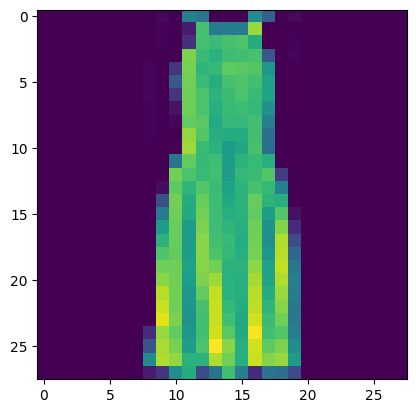

In [13]:
idx = np.random.choice(np.where(y==3)[0])
print(y[idx])

img = np.reshape(x.values[idx],(28,28))
plt.imshow(img)

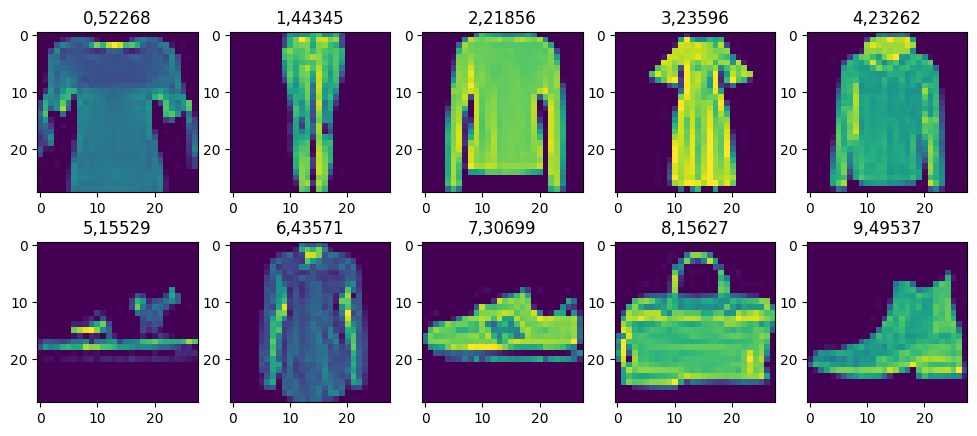

In [14]:
plt.figure(figsize=(12,5))

for i in range (10):
  plt.subplot(2,5, i+1)
  idx = np.random.choice(np.where(y==i)[0])
  plt.title(f"{y[idx]},{idx}")
  img_grid = np.reshape(x.values[idx],(28,28))
  plt.imshow(img_grid)

In [15]:

item_dictionary = {0: 't-shirt/top', 1: 'trouser',
                   2: 'pullover', 3: 'dress',
                   4: 'coat', 5: 'sandal',
                   6: 'shirt', 7: 'sneaker',
                   8: 'bag', 9: 'ankle_boot'}

y = y.map(item_dictionary)

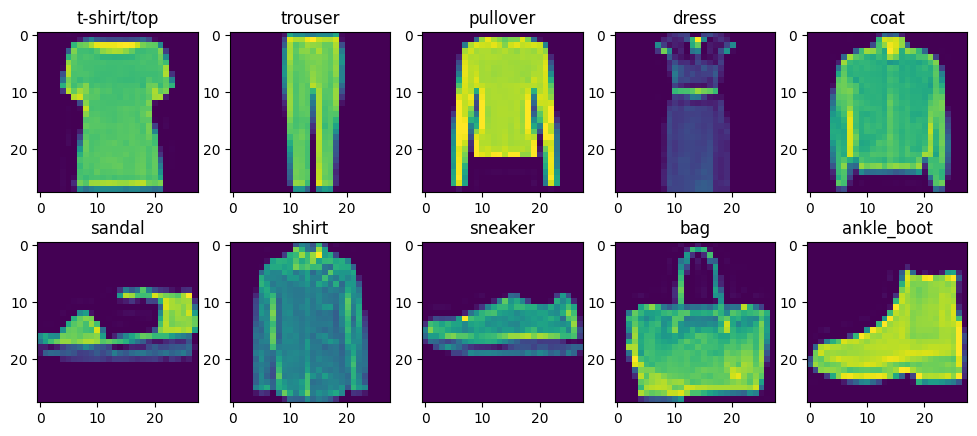

In [17]:
plt.figure(figsize=(12, 5))

for i in item_dictionary:
    plt.subplot(2, 5, i+1)
    idx = np.random.choice(np.where(y == item_dictionary[i])[0])
    plt.title(f"{y[idx]}")
    img_grid = np.reshape(x.values[idx], (28,28))
    plt.imshow(img_grid)


In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

x_low_dim = pca.fit_transform(x)

print(x_low_dim[:5])


[[  940.01497881  1264.93489864]
 [-1115.99075998   984.5699645 ]
 [ 1852.61374031   400.03294731]
 [  823.08592314  -592.94037585]
 [ 1057.32517786 -1029.96551339]]


In [24]:
df_low_dim = pd.DataFrame(x_low_dim, columns=['feature_1', 'feature_2'])

df_low_dim['y'] = y

df_low_dim.head()

,feature_1,feature_2,y
0,940.014979,1264.934899,pullover
1,-1115.990760,984.569965,ankle_boot
2,1852.613740,400.032947,shirt
3,823.085923,-592.940376,t-shirt/top
4,1057.325178,-1029.965513,dress


<Axes: xlabel='feature_1', ylabel='feature_2'>

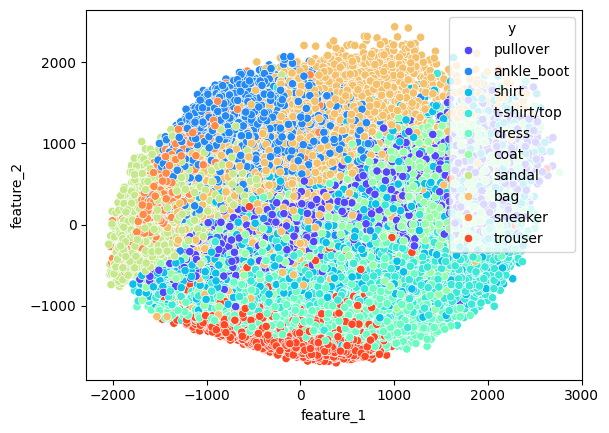

In [25]:
sns.scatterplot(data=df_low_dim, x="feature_1", y="feature_2", hue="y", palette="rainbow")


# train test split

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
sifier = KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2,n_jobs=-1)
sifier.fit(x_train,y_train)

KNeighborsClassifier(n_jobs=-1)

# prediction on unseen data points

In [39]:

y_test_pred= sifier.predict(x_test)

# Evaluation

In [40]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_test_pred)

0.8546

In [43]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

  ankle_boot       0.87      0.97      0.92      1477
         bag       0.97      0.95      0.96      1522
        coat       0.76      0.79      0.77      1476
       dress       0.90      0.88      0.89      1524
    pullover       0.74      0.81      0.77      1514
      sandal       1.00      0.81      0.89      1493
       shirt       0.67      0.59      0.63      1509
     sneaker       0.88      0.95      0.91      1485
 t-shirt/top       0.79      0.84      0.81      1487
     trouser       1.00      0.96      0.98      1513

    accuracy                           0.85     15000
   macro avg       0.86      0.85      0.85     15000
weighted avg       0.86      0.85      0.85     15000



In [44]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[1432,    0,    0,    0,    1,    1,    0,   43,    0,    0],
       [   7, 1449,   14,    8,   21,    0,   16,    4,    3,    0],
       [   0,    3, 1162,   47,  151,    0,  107,    0,    6,    0],
       [   0,    1,   72, 1343,    7,    0,   47,    0,   52,    2],
       [   0,    4,  152,    8, 1226,    0,  112,    0,   12,    0],
       [ 127,    7,    1,    1,    0, 1206,    7,  142,    2,    0],
       [   0,   19,  119,   27,  201,    0,  887,    0,  255,    1],
       [  71,    1,    0,    0,    0,    4,    0, 1409,    0,    0],
       [   0,   13,    9,   31,   33,    0,  146,    1, 1253,    1],
       [   0,    1,    2,   30,   13,    0,    7,    0,    8, 1452]])

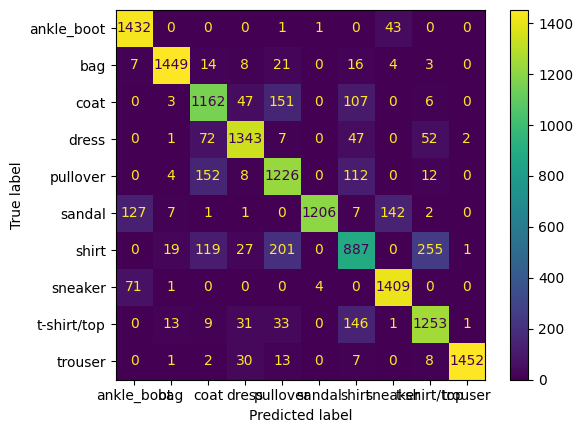

In [45]:
cm = metrics.confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)

fig = metrics.ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)

fig.plot()

In [47]:
actual = np.sum(cm, axis=1).reshape(-1, 1)

cmn = np.round(cm/actual, 2)

print("Normalized Confusion Matrix:")
print(cmn)

Normalized Confusion Matrix:
[[0.97 0.   0.   0.   0.   0.   0.   0.03 0.   0.  ]
 [0.   0.95 0.01 0.01 0.01 0.   0.01 0.   0.   0.  ]
 [0.   0.   0.79 0.03 0.1  0.   0.07 0.   0.   0.  ]
 [0.   0.   0.05 0.88 0.   0.   0.03 0.   0.03 0.  ]
 [0.   0.   0.1  0.01 0.81 0.   0.07 0.   0.01 0.  ]
 [0.09 0.   0.   0.   0.   0.81 0.   0.1  0.   0.  ]
 [0.   0.01 0.08 0.02 0.13 0.   0.59 0.   0.17 0.  ]
 [0.05 0.   0.   0.   0.   0.   0.   0.95 0.   0.  ]
 [0.   0.01 0.01 0.02 0.02 0.   0.1  0.   0.84 0.  ]
 [0.   0.   0.   0.02 0.01 0.   0.   0.   0.01 0.96]]


Text(0.5, 23.38159722222222, 'Predicted')

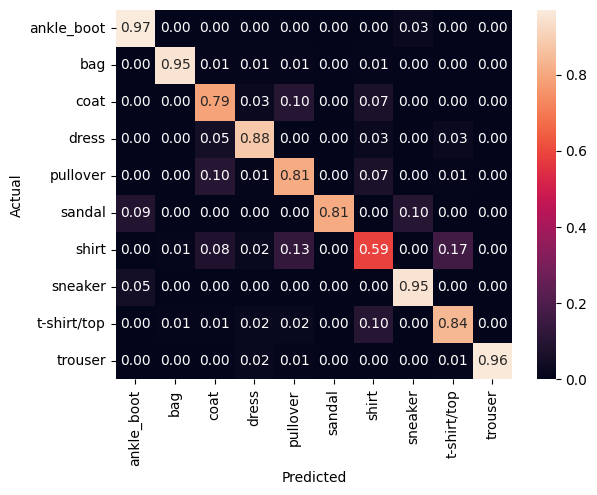

In [48]:
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')